In [4]:
import numpy as np
import sys
from PyQt4 import QtGui
import os


In [2]:
def window():
    app = QtGui.QApplication(sys.argv)
    w = QtGui.QWidget()
    b = QtGui.QLabel(w)
    b.setText("Hello World!")
    w.setGeometry(100,100,200,50)
    b.move(50,20)
    w.setWindowTitle('PyQt')
    w.show()
    sys.exit(app.exec_())

if __name__ == '__main__':
    window()

SystemExit: 0

To exit: use 'exit', 'quit', or Ctrl-D.


In [5]:
patient = 'Camus'
pathToPlans = '/home/smcp/janik/dto/patients/'+patient+'/plans'

In [6]:
print(os.listdir(pathToPlans))

['plan_ant', 'plan_minpath', 'plan_Astar']


In [7]:
opt_plans = []
for plan in os.listdir(pathToPlans) :    
    if 'opt' in os.listdir(pathToPlans+'/'+plan) :
        opt_plans.append(plan)

In [8]:
import collections

In [9]:
print(opt_plans)

['plan_ant', 'plan_minpath', 'plan_Astar']


In [10]:
def readObjectiveCost (path) :
    File = open(path,'r')
    lines = File.read()
    info = lines.split('\n')
    objectives = {}
    for i in info :
        if i != '' :
            l = i.split(' = ')
            objectives[l[0]] = float(l[1])
    ordered = collections.OrderedDict(sorted(objectives.items()))
    return ordered

In [11]:
obj = []
for p in opt_plans :
    obj.append(readObjectiveCost(path=pathToPlans+'/'+p+'/'+'opt/objectives_cost.txt'))

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
reference = [False,False,True]
for i, o in enumerate(obj) :
    if reference[i] :
        norm = np.array(list(o.values()))

In [14]:
print(np.array(norm))

[  1.11907674e+00   6.61829582e+01   0.00000000e+00   2.62878337e+00
   0.00000000e+00   2.61248768e-02   1.71926501e-03   1.04342670e-02
   1.60455758e+05   6.73670193e+04   6.79094376e-01   2.27893426e+05]


In [15]:
def safe_divide (a,b) :
    return np.divide(a, b, out=np.zeros_like(a), where=b!=0)

odict_keys(['Auge_li-4', 'Auge_re-5', 'Hirn-6', 'Hirnstamm-7', 'Innenohr-8', 'Myelon-9', 'NTO', 'PTV_I.1.1-1', 'PTV_I.1.1-2', 'PTV_I.1.1-3', 'Parotis_re-10', 'TOTAL'])
[  5.22590542e-01   2.07728124e+01   0.00000000e+00   6.64433938e-01
   0.00000000e+00   5.37358224e-03   2.09929496e-01   0.00000000e+00
   1.79239568e+05   8.38196723e+04   1.18917320e-02   2.63081428e+05]
[  1.11907674e+00   6.61829582e+01   0.00000000e+00   2.62878337e+00
   0.00000000e+00   2.61248768e-02   1.71926501e-03   1.04342670e-02
   1.60455758e+05   6.73670193e+04   6.79094376e-01   2.27893426e+05]
[  4.66983652e+01   3.13869506e+01   0.00000000e+00   2.52753401e+01
   0.00000000e+00   2.05688328e+01   1.22104210e+04   0.00000000e+00
   1.11706535e+02   1.24422415e+02   1.75111626e+00   1.15440552e+02]
odict_keys(['Auge_li-4', 'Auge_re-5', 'Hirn-6', 'Hirnstamm-7', 'Innenohr-8', 'Myelon-9', 'NTO', 'PTV_I.1.1-1', 'PTV_I.1.1-2', 'PTV_I.1.1-3', 'Parotis_re-10', 'TOTAL'])
[  8.14363032e-02   2.49575818e+01   0.0

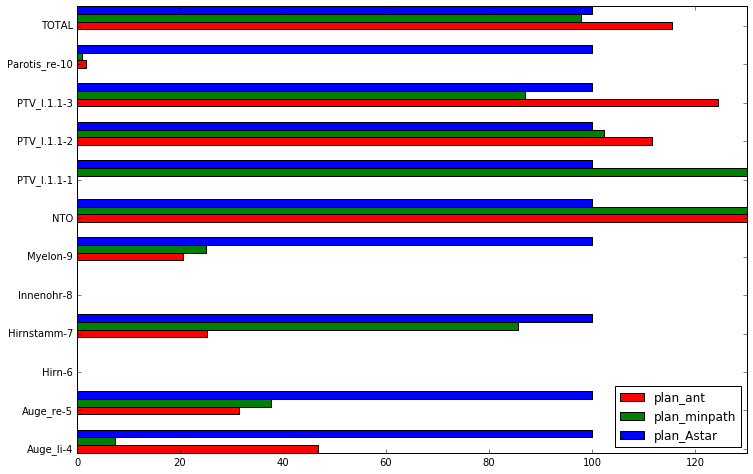

In [26]:
color = ['r','g','b','m','y','k']
plt.figure(figsize=(12,8))
for shift, o in enumerate(obj) :
    
    num = np.array(list(o.values()))
    print(o.keys())
    print(num)
    print(norm)
    print(safe_divide(num,norm)*100 )
    print('=========================================')
    #print(safe_divide(num,norm)*100)
    plt.barh(range(len(o))+(np.zeros(len(o))+shift)*0.2, width=safe_divide(num,norm)*100 , height=0.2, 
             align='center',label=opt_plans[shift],color=color[shift])
    plt.yticks(range(len(o)), o.keys(),rotation=0)

plt.xlim(0,130)
plt.legend(loc='best')
plt.show()